In [1]:
# Import necessaru libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime


In [2]:
irra = pd.read_csv("C:\\users\\MagicBook\\Desktop\\Jersey City Solar.csv",encoding='latin1')

irra.head()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Wind Speed,Relative Humidity,Temperature,Pressure,GHI_Day_Ahead
0,2015,1,1,8,30,93,93,0,0.4,66.16,0.0,970,0
1,2015,1,1,9,30,236,236,0,0.3,63.72,2.0,970,89
2,2015,1,1,10,30,351,351,0,0.3,65.71,5.0,970,228
3,2015,1,1,11,30,419,419,0,0.3,70.69,7.0,960,340
4,2015,1,1,12,30,432,432,0,0.2,75.98,8.0,960,407


In [3]:
irra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17488 entries, 0 to 17487
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               17488 non-null  object 
 1   Month              17488 non-null  int64  
 2   Day                17488 non-null  int64  
 3   Hour               17488 non-null  int64  
 4   Minute             17488 non-null  int64  
 5   GHI                17488 non-null  int64  
 6   Clearsky GHI       17488 non-null  int64  
 7   Cloud Type         17488 non-null  int64  
 8   Wind Speed         17488 non-null  float64
 9   Relative Humidity  17488 non-null  float64
 10  Temperature        17488 non-null  float64
 11  Pressure           17488 non-null  int64  
 12  GHI_Day_Ahead      17488 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [4]:
irra.describe()

,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Wind Speed,Relative Humidity,Temperature,Pressure,GHI_Day_Ahead
count,17488.000000,17488.000000,17488.000000,17488.0,17488.000000,17488.000000,17488.000000,17488.000000,17488.00000,17488.000000,17488.000000,17488.000000
mean,6.435899,15.717120,11.729643,30.0,375.658051,460.292601,2.935441,0.253877,61.67368,17.437208,962.697621,371.854472
std,3.171236,8.789467,3.631349,0.0,288.177869,281.892659,2.981157,0.125949,28.28524,9.503841,5.585474,292.496804
min,1.000000,1.000000,3.000000,30.0,0.000000,0.000000,0.000000,0.000000,5.06000,-10.000000,930.000000,0.000000
25%,4.000000,8.000000,9.000000,30.0,119.000000,228.000000,0.000000,0.200000,36.75500,10.000000,960.000000,112.000000
50%,6.000000,16.000000,12.000000,30.0,317.500000,442.000000,2.000000,0.200000,63.98000,16.000000,960.000000,317.000000
75%,9.000000,23.000000,15.000000,30.0,605.000000,694.000000,6.000000,0.300000,86.72500,24.900000,968.000000,605.000000
max,12.000000,31.000000,20.000000,30.0,1025.000000,1025.000000,9.000000,1.000000,100.00000,44.000000,980.000000,1025.000000


In [5]:
# Convert mbar to Hg
irra["Pressure"] = irra["Pressure"].apply(lambda x: round(x*0.02953,1))

**EDA**

[Text(0.5, 1.0, 'Feature Correlation')]

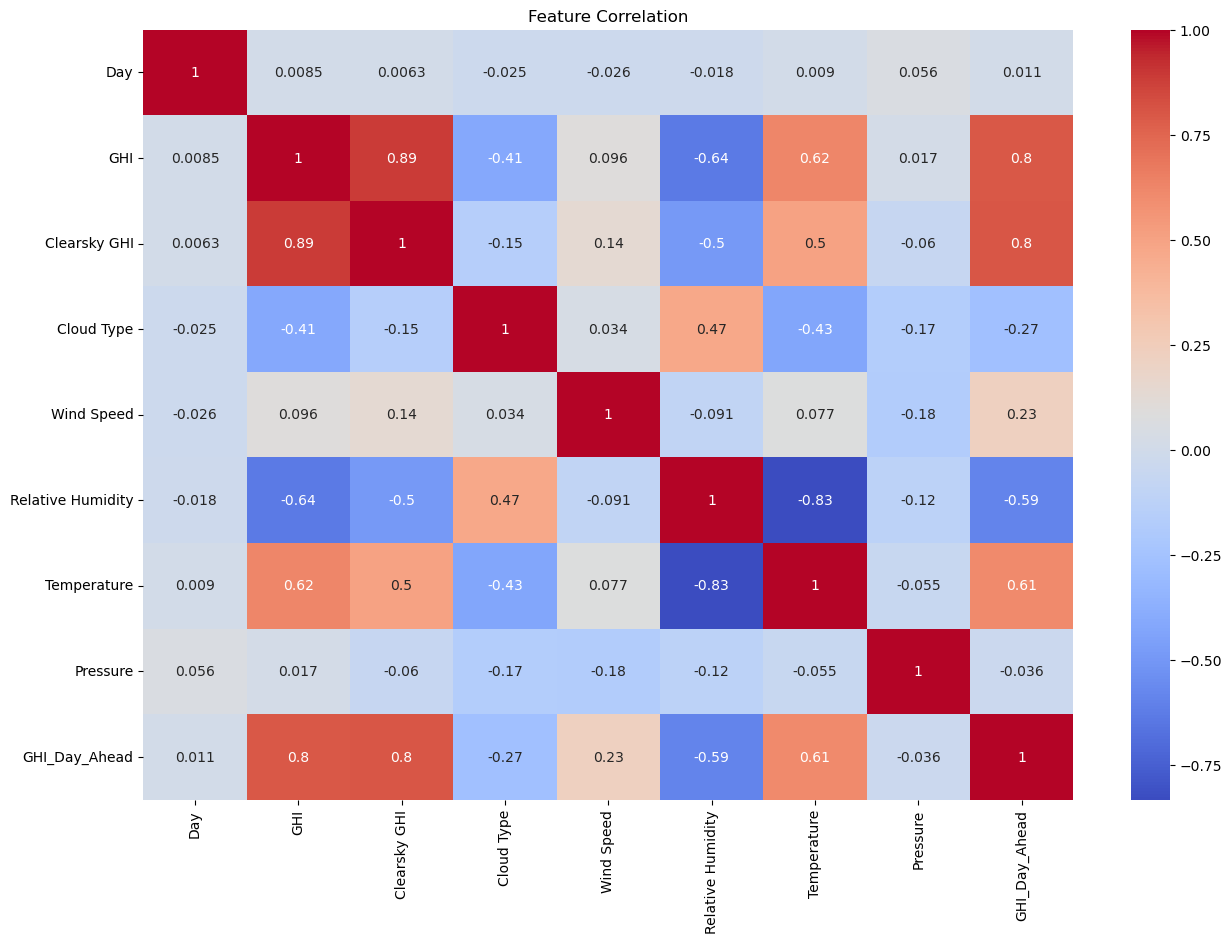

In [6]:
# Setting plot size
plt.subplots(figsize=(15,10))

# Created correlation heatmap
sns.heatmap(irra.drop(['Month','Hour','Minute','Year'],axis=1).corr(), annot=True,cmap='coolwarm').set(title = 'Feature Correlation')

In [7]:
# Create new dataset based on groupby of 'Hour' and 'Month' respectively
day_h = irra.groupby('Hour').mean().reset_index()
day_m = irra.groupby('Month').mean().reset_index()

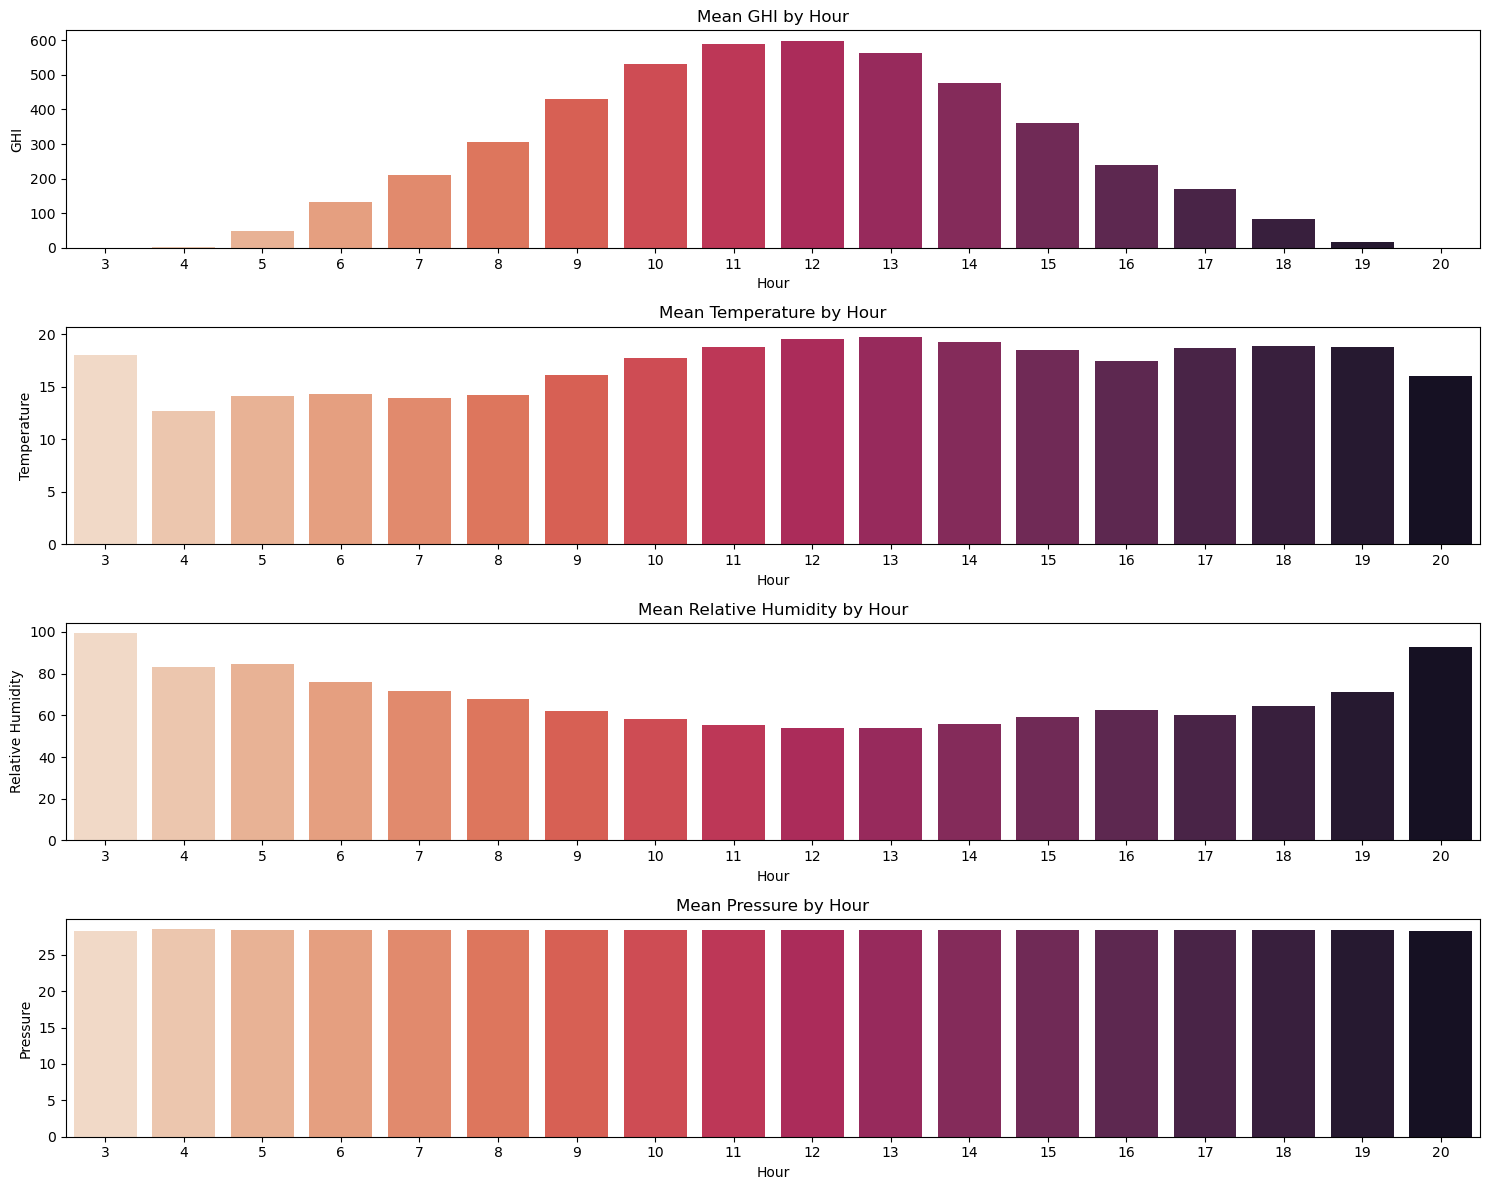

In [8]:
fig, axs = plt.subplots(4, 1, figsize=(15,12))
axs[0].set_title('Mean GHI by Hour')
axs[1].set_title('Mean Temperature by Hour')
axs[2].set_title('Mean Relative Humidity by Hour')
axs[3].set_title('Mean Pressure by Hour')

sns.barplot(x='Hour', y='GHI', data=day_h, palette='rocket_r', ax=axs[0])
sns.barplot(x='Hour', y='Temperature', data=day_h, palette='rocket_r', ax=axs[1])
sns.barplot(x='Hour', y='Relative Humidity', data=day_h, palette='rocket_r', ax=axs[2])
sns.barplot(x='Hour', y='Pressure', data=day_h, palette='rocket_r', ax=axs[3])

plt.tight_layout()

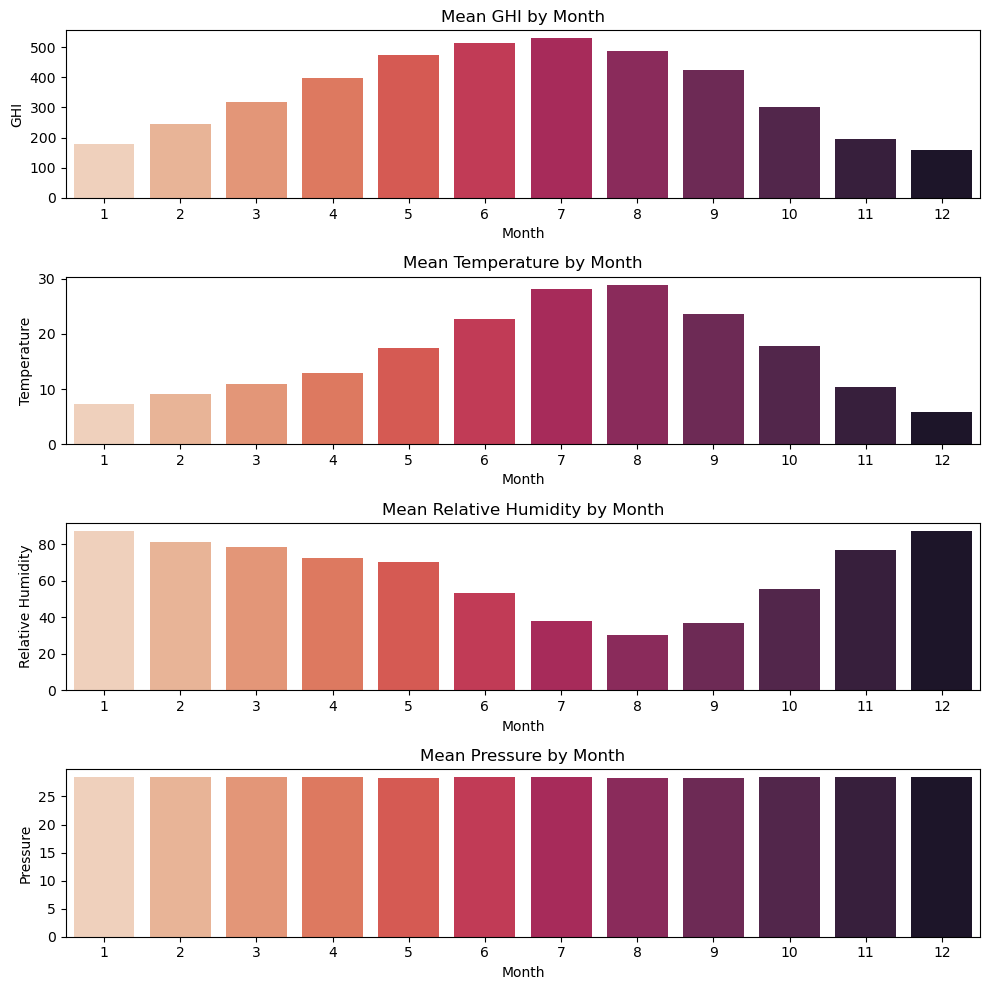

In [9]:
fig, axs = plt.subplots(4, 1, figsize=(10,10))
axs[0].set_title('Mean GHI by Month')
axs[1].set_title('Mean Temperature by Month')
axs[2].set_title('Mean Relative Humidity by Month')
axs[3].set_title('Mean Pressure by Month')

sns.barplot(x='Month', y='GHI', data=day_m, palette='rocket_r', ax=axs[0])
sns.barplot(x='Month', y='Temperature', data=day_m, palette='rocket_r', ax=axs[1])
sns.barplot(x='Month', y='Relative Humidity', data=day_m, palette='rocket_r', ax=axs[2])
sns.barplot(x='Month', y='Pressure', data=day_m, palette='rocket_r', ax=axs[3])

plt.tight_layout()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(irra[['Temperature', 'Pressure', 'Relative Humidity', 'Wind Speed', 'Day', 'Month']], irra.GHI, test_size=0.25)

In [12]:
# Creating model instance and performing cross validation
lr = LinearRegression()

crs = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print('Average R2:', crs.mean())

Average R2: 0.4708089775022569


In [13]:
rf = RandomForestRegressor()

crs = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print('Average R2:', crs.mean())

Average R2: 0.6726982920482908


In [14]:
gb = GradientBoostingRegressor()

crs = cross_val_score(gb, X_train, y_train, cv=5, scoring='r2')
print('Average R2:', crs.mean())

Average R2: 0.6294984909953225


In [15]:
# Created simple reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [16]:
# Library imports for hyperparameter tuning
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

rf = RandomForestRegressor(random_state = 1)
param_grid =  {'n_estimators': [100,500], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
rf_par = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 50, cv = 5, verbose = 1)
best_rf = rf_par.fit(X_train,y_train)
clf_performance(best_rf,'Random Forest')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest
Best Score: 0.6851971227185109
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [17]:
# Using best parameter, refine hyperparameters even more.
rf = RandomForestRegressor(random_state = 1)
param_grid =  {'n_estimators': [200],
                                  'bootstrap': [True],
                                  'max_depth': [50],
                                  'max_features': ['auto'],
                                  'min_samples_leaf': [2],
                                  'min_samples_split': [2]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = 1, refit = True)
best_clf_rf = clf_rf.fit(X_train, y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Random Forest
Best Score: 0.6741533724892841
Best Parameters: {'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


MAE: 127.7510166389344
RMSE: 165.0732215062897
R2_Score: 0.6668314336713833


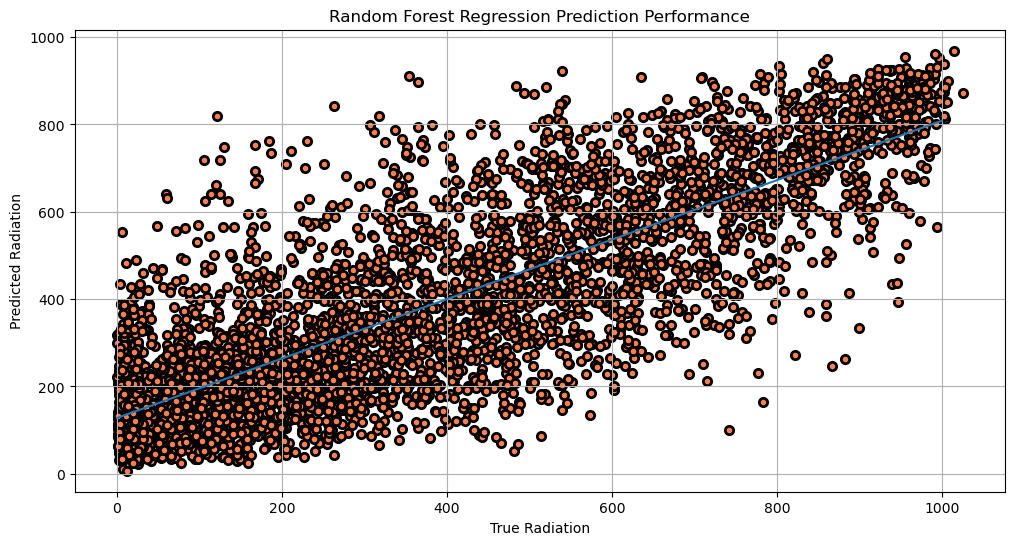

In [19]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Reporting metrics
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2_Score:', r2_score(y_test, rf_pred))

# Created scatter plot of true Vs. predicted radiation
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True Radiation') 
plt.ylabel('Predicted Radiation') 
plt.title('Random Forest Regression Prediction Performance') 
plt.grid()

m, b = np.polyfit(y_test,rf_pred,1)
x = np.arange(y_test.min(),y_test.max(),50)
plt.plot(x,m*x+b)

In [38]:
lab = irra[['GHI']].copy()
lab['Predicted GHI'] = best_clf_rf.predict(irra[['Temperature', 'Pressure', 'Relative Humidity', 'Wind Speed', 'Day', 'Month']])

In [39]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d

output_notebook() 
p = figure(plot_width=800, 
           plot_height=400,
           title="Solar Irradiance Predictions",
           x_axis_label='Date and Time',
           y_axis_label='Solar Irradiance',
           x_axis_type="datetime")
p.x_range = Range1d(lab.index[0], lab.index[600])
p.y_range = Range1d(-100, 1800, bounds=(-100, 1800))
p.line(lab.index, lab['GHI'], legend_label='Observed Solar Irradiance', line_width=1)
p.line(lab.index, lab['Predicted GHI'], legend_label='Predicted Solar Irradiance', line_width=1, line_color="red")

show(p, notebook_handle = True)

Loading BokehJS ...

In [40]:
from tensorflow.keras.layers import LSTM

In [41]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((24,10)))
model2.add(LSTM(50))
model2.add(Dense(50,'relu'))
model2.add(Dense(10,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,271
Trainable params: 15,271
Non-trainable params: 0
_________________________________________________________________


In [42]:
cp = ModelCheckpoint('model2/',save_best_only =True)
model2.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate = 0.0001), metrics = RootMeanSquaredError()) 

In [47]:
from sklearn.metrics import r2_score
print('Average R2:', crs.mean())
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))

Average R2: 0.6294984909953225
MAE: 303.3966245336066
RMSE: 376.47753793491773
